In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv('train.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X=df.iloc[:, 1:].values
y=df.iloc[:, 0].values

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

In [5]:
X_train = X_train / 255.0
X_val = X_val / 255.0


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
class NeuralNetworkModel(nn.Module):
    def __init__(self):
        super(NeuralNetworkModel,self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10), 
            nn.Softmax()
        )


    def forward(self, x):
        return self.layers(x)

model = NeuralNetworkModel()

In [8]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                               torch.tensor(y_train, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# Training loop
num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     optimizer.zero_grad()      # Clear previous gradients
#     outputs = model(torch.tensor(X_train, dtype=torch.float32))   # Forward pass
#     loss = loss_fn(outputs, torch.tensor(y_train, dtype=torch.long))  # Compute loss
#     loss.backward()            # Backward pass
#     optimizer.step() 

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = loss_fn(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    scheduler.step()

    #val
    model.eval()
    with torch.no_grad():
        val_outputs = model(torch.tensor(X_val, dtype=torch.float32))
        val_preds = torch.argmax(val_outputs, dim=1)
        acc = (val_preds.numpy() == y_val).mean()
    
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Validation Accuracy: {acc:.4f}")
   

    

c:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1751: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 1, Loss: 1.6352, Validation Accuracy: 0.8187
Epoch 2, Loss: 1.6375, Validation Accuracy: 0.8417
Epoch 3, Loss: 1.6156, Validation Accuracy: 0.8530
Epoch 4, Loss: 1.5119, Validation Accuracy: 0.9418
Epoch 5, Loss: 1.5278, Validation Accuracy: 0.9483
Epoch 6, Loss: 1.4925, Validation Accuracy: 0.9538
Epoch 7, Loss: 1.5257, Validation Accuracy: 0.9611
Epoch 8, Loss: 1.5021, Validation Accuracy: 0.9618
Epoch 9, Loss: 1.4768, Validation Accuracy: 0.9575
Epoch 10, Loss: 1.4981, Validation Accuracy: 0.9526
Epoch 11, Loss: 1.4615, Validation Accuracy: 0.9651
Epoch 12, Loss: 1.4712, Validation Accuracy: 0.9680
Epoch 13, Loss: 1.5035, Validation Accuracy: 0.9655
Epoch 14, Loss: 1.4922, Validation Accuracy: 0.9696
Epoch 15, Loss: 1.5080, Validation Accuracy: 0.9650
Epoch 16, Loss: 1.4612, Validation Accuracy: 0.9710
Epoch 17, Loss: 1.4768, Validation Accuracy: 0.9699
Epoch 18, Loss: 1.4612, Validation Accuracy: 0.9690
Epoch 19, Loss: 1.4612, Validation Accuracy: 0.9736
Epoch 20, Loss: 1.508

In [10]:
# Inference
model.eval()
test_outputs = model(torch.tensor(X_val, dtype=torch.float32))
preds = torch.argmax(test_outputs, dim=1)


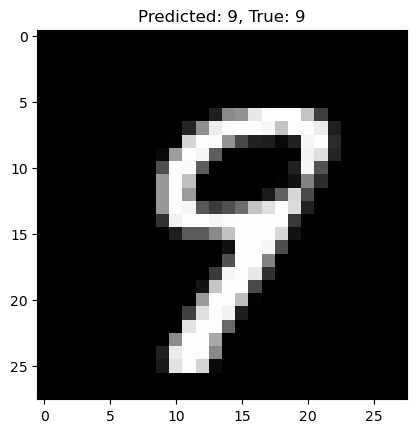

In [14]:
rand_idx = np.random.randint(0, len(X_val))
x_sample = X_val[rand_idx, :]

with torch.no_grad():
    x_tensor = torch.tensor(x_sample, dtype=torch.float32).unsqueeze(0)  # (1, 784)
    pred = model(x_tensor)

x_sample = x_sample.reshape(28, 28)
plt.imshow(x_sample, cmap='gray')
plt.title(f"Predicted: {torch.argmax(pred).item()}, True: {y_val[rand_idx]}")
plt.show()


#print(f"Logits: {pred}")
